**Submitted by : Akshay Bajpai**

**subject : Deep Learning & Intelligent Systems**

**Study group: KNSSh-11f**

**Institute: ICNI**

In [62]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

np.random.seed(2)

In [63]:
data = pd.read_csv('chinese_mnist.csv', low_memory = False)

In [64]:
data.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [65]:
IMAGE_PATH = "data/data/"
print("dataframe rows:", data.shape[0]) 
print("image files :", len(os.listdir(IMAGE_PATH)))

dataframe rows: 15000
image files : 15000


In [66]:
def file_path_col(data):    
    file_path = f"input_{data[0]}_{data[1]}_{data[2]}.jpg"
    return file_path

data["file_path"] = data.apply(file_path_col, axis = 1)

In [67]:
data.head()

,suite_id,sample_id,code,value,character,file_path
0,1,1,10,9,九,input_1_1_10.jpg
1,1,10,10,9,九,input_1_10_10.jpg
2,1,2,10,9,九,input_1_2_10.jpg
3,1,3,10,9,九,input_1_3_10.jpg
4,1,4,10,9,九,input_1_4_10.jpg


In [68]:
data.groupby(["value","character"]).size()

value      character
0          零            1000
1          一            1000
2          二            1000
3          三            1000
4          四            1000
5          五            1000
6          六            1000
7          七            1000
8          八            1000
9          九            1000
10         十            1000
100        百            1000
1000       千            1000
10000      万            1000
100000000  亿            1000
dtype: int64

In [69]:
data.isnull().sum()

suite_id     0
sample_id    0
code         0
value        0
character    0
file_path    0
dtype: int64

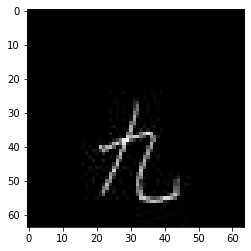

In [70]:
path = os.path.join(IMAGE_PATH, data['file_path'][0])
path_img = imread(path)
plt.imshow(path_img, cmap='gray')

In [71]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=0, stratify=data["code"].values, shuffle = True)

print(train.shape[0])
print(test.shape[0])

12000
3000


In [72]:
train_data, val_data = train_test_split(train, test_size=0.2, random_state=0, stratify=train["code"].values, shuffle = True)

In [73]:
print(f"Train set rows: {train.shape[0]}")
print(f"Test set rows: {test.shape[0]}")
print(f"Val set rows: {val_data.shape[0]}")

Train set rows: 12000
Test set rows: 3000
Val set rows: 2400


In [74]:
import skimage.io
import skimage.transform

def read_image(file_name):
    path = os.path.join(IMAGE_PATH, file_name)
    
    image = skimage.io.imread(path)
    image = skimage.transform.resize(image, (64, 64, 1), mode='reflect')
    
    return image[:,:,:]

def character_encoder(dataset, var='character'):
    X = np.stack(dataset['file_path'].apply(read_image))
    y = pd.get_dummies(dataset[var], drop_first=False)
    return X, y

In [75]:
X_train, y_train = character_encoder(train)
X_val, y_val = character_encoder(val_data)
X_test, y_test = character_encoder(test)

print(X_train.shape, ",", y_train.shape)
print(X_val.shape, ",", y_val.shape)
print(X_test.shape, ",", y_test.shape)

(12000, 64, 64, 1) , (12000, 15)
(2400, 64, 64, 1) , (2400, 15)
(3000, 64, 64, 1) , (3000, 15)


* WITH ADAM OPTIMISER

In [76]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), input_shape=X_train.shape[1:], padding = 'same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size = (5, 5), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (5, 5), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(164, kernel_size = (5, 5), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        832       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        102464    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 8, 8, 64)        

In [77]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
94/94 [==============================] - 45s 476ms/step - loss: 1.5050 - accuracy: 0.4825 - val_loss: 0.4969 - val_accuracy: 0.8396
Epoch 2/5
94/94 [==============================] - 50s 533ms/step - loss: 0.4256 - accuracy: 0.8482 - val_loss: 0.2855 - val_accuracy: 0.8992
Epoch 3/5
94/94 [==============================] - 54s 577ms/step - loss: 0.2322 - accuracy: 0.9200 - val_loss: 0.1367 - val_accuracy: 0.9542
Epoch 4/5
94/94 [==============================] - 51s 538ms/step - loss: 0.1356 - accuracy: 0.9561 - val_loss: 0.0700 - val_accuracy: 0.9792
Epoch 5/5
94/94 [==============================] - 49s 522ms/step - loss: 0.1148 - accuracy: 0.9616 - val_loss: 0.0651 - val_accuracy: 0.9775


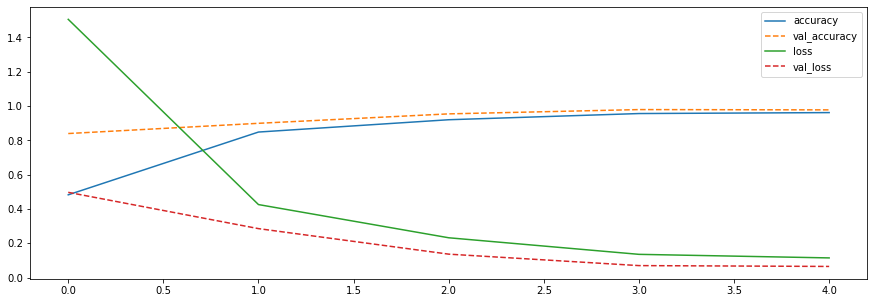

In [78]:
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy', linestyle='--')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss', linestyle='--')
plt.legend()

In [79]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, y_test)

print(f'Test Loss is {ModelLoss}')
print(f'Test Accuracy is {ModelAccuracy}')

94/94 [==============================] - 3s 30ms/step - loss: 0.0867 - accuracy: 0.9700
Test Loss is 0.08671651035547256
Test Accuracy is 0.9700000286102295


In [80]:
mape = model.evaluate(X_test, y_test)

94/94 [==============================] - 2s 26ms/step - loss: 0.0867 - accuracy: 0.9700


In [81]:
mae = model.evaluate(X_test, y_test)

94/94 [==============================] - 3s 27ms/step - loss: 0.0867 - accuracy: 0.9700


In [82]:
mse = model.evaluate(X_test, y_test)

94/94 [==============================] - 2s 26ms/step - loss: 0.0867 - accuracy: 0.9700


* WITH SGD OPTIMIZER

In [83]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), input_shape=X_train.shape[1:], padding = 'same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size = (5, 5), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (5, 5), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(164, kernel_size = (5, 5), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 64, 64, 32)        832       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)        102464    
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 8, 8, 64)        

In [84]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
94/94 [==============================] - 47s 498ms/step - loss: 2.7073 - accuracy: 0.0768 - val_loss: 2.7063 - val_accuracy: 0.1033
Epoch 2/5
94/94 [==============================] - 47s 504ms/step - loss: 2.7057 - accuracy: 0.1125 - val_loss: 2.7046 - val_accuracy: 0.1412
Epoch 3/5
94/94 [==============================] - 55s 581ms/step - loss: 2.7041 - accuracy: 0.1493 - val_loss: 2.7028 - val_accuracy: 0.1929
Epoch 4/5
94/94 [==============================] - 49s 525ms/step - loss: 2.7022 - accuracy: 0.1657 - val_loss: 2.7006 - val_accuracy: 0.2067
Epoch 5/5
94/94 [==============================] - 49s 521ms/step - loss: 2.6997 - accuracy: 0.1842 - val_loss: 2.6976 - val_accuracy: 0.2154


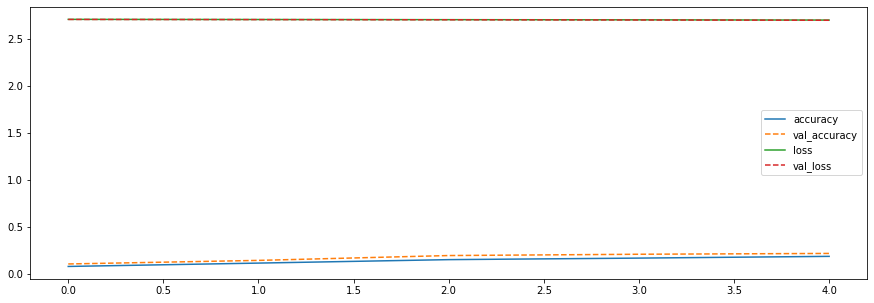

In [85]:
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy', linestyle='--')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss', linestyle='--')
plt.legend()

In [86]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, y_test)

print(f'Test Loss is {ModelLoss}')
print(f'Test Accuracy is {ModelAccuracy}')

94/94 [==============================] - 3s 30ms/step - loss: 2.6973 - accuracy: 0.2117
Test Loss is 2.697282314300537
Test Accuracy is 0.21166667342185974


In [87]:
mape = model.evaluate(X_test, y_test)

94/94 [==============================] - 3s 30ms/step - loss: 2.6973 - accuracy: 0.2117


In [88]:
mae = model.evaluate(X_test, y_test)

94/94 [==============================] - 3s 29ms/step - loss: 2.6973 - accuracy: 0.2117


In [89]:
mse = model.evaluate(X_test, y_test)

94/94 [==============================] - 3s 29ms/step - loss: 2.6973 - accuracy: 0.2117


* WITH ADAGRAD OPTIMIZER

In [90]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), input_shape=X_train.shape[1:], padding = 'same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size = (5, 5), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (5, 5), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(164, kernel_size = (5, 5), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy']) 
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 64, 64, 32)        832       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 64)        102464    
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 8, 64)        

In [91]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
94/94 [==============================] - 50s 531ms/step - loss: 2.7076 - accuracy: 0.0872 - val_loss: 2.7071 - val_accuracy: 0.1175
Epoch 2/5
94/94 [==============================] - 49s 523ms/step - loss: 2.7069 - accuracy: 0.1085 - val_loss: 2.7065 - val_accuracy: 0.1475
Epoch 3/5
94/94 [==============================] - 49s 522ms/step - loss: 2.7065 - accuracy: 0.1213 - val_loss: 2.7059 - val_accuracy: 0.1621
Epoch 4/5
94/94 [==============================] - 49s 522ms/step - loss: 2.7059 - accuracy: 0.1325 - val_loss: 2.7054 - val_accuracy: 0.1733
Epoch 5/5
94/94 [==============================] - 49s 525ms/step - loss: 2.7055 - accuracy: 0.1381 - val_loss: 2.7049 - val_accuracy: 0.1800


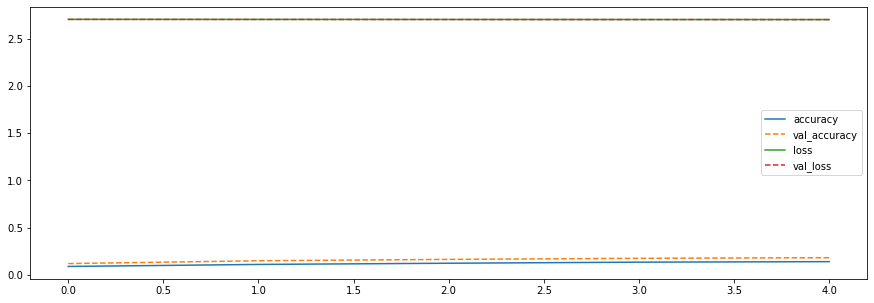

In [92]:
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy', linestyle='--')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss', linestyle='--')
plt.legend()

In [93]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, y_test)

print(f'Test Loss is {ModelLoss}')
print(f'Test Accuracy is {ModelAccuracy}')

94/94 [==============================] - 3s 27ms/step - loss: 2.7048 - accuracy: 0.1873
Test Loss is 2.704793691635132
Test Accuracy is 0.18733333051204681


In [94]:
mape = model.evaluate(X_test, y_test)

94/94 [==============================] - 3s 31ms/step - loss: 2.7048 - accuracy: 0.1873


In [95]:
mae = model.evaluate(X_test, y_test)

94/94 [==============================] - 3s 28ms/step - loss: 2.7048 - accuracy: 0.1873


In [96]:
mse = model.evaluate(X_test, y_test)

94/94 [==============================] - 3s 30ms/step - loss: 2.7048 - accuracy: 0.1873
